In [87]:
#  Imports

import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [95]:
#  Constants  (change these to whatever you want)

v_prob_in_bin  = np.linspace(0.01, 0.99, 3)
v_dataset_size = [200, 1000]
num_bootstraps = 10000

In [96]:
#  Utility functions

def get_A (Nbin, Ntot) :
    return Nbin / Ntot

def get_errA (Nbin, Ntot) :
    return get_A(Nbin, Ntot) * np.sqrt((1./Nbin)-(1./Ntot))

def get_A_and_error (Nbin, Ntot) :
    return get_A(Nbin, Ntot), get_errA(Nbin, Ntot)

In [97]:
#  More utility functions

def generate_dataset (prob_in_bin, dataset_size) :
    dataset_evts    = np.random.choice(2, size=dataset_size, p=[1.-prob_in_bin, prob_in_bin])
    dataset_weights = np.ones(shape=(dataset_size,))
    return dataset_evts, dataset_weights

def get_Nbin_Ntot_from_dataset (dataset, weights) :
    Nbin = np.sum([w for w, x in zip(weights, dataset) if x == 0])
    Ntot = np.sum(weights)
    return Nbin, Ntot

def get_A_from_dataset (dataset, weights) :
    Nbin, Ntot = get_Nbin_Ntot_from_dataset(dataset, weights)
    return get_A (Nbin, Ntot)

def get_A_and_error_from_dataset (dataset, weights) :
    Nbin, Ntot = get_Nbin_Ntot_from_dataset(dataset, weights)
    return get_A_and_error (Nbin, Ntot)

Running 10000 bootstraps for p_bin=0.01, Ntot=200
Running 10000 bootstraps for p_bin=0.50, Ntot=200
Running 10000 bootstraps for p_bin=0.99, Ntot=200
Running 10000 bootstraps for p_bin=0.01, Ntot=1000
Running 10000 bootstraps for p_bin=0.50, Ntot=1000
Running 10000 bootstraps for p_bin=0.99, Ntot=1000


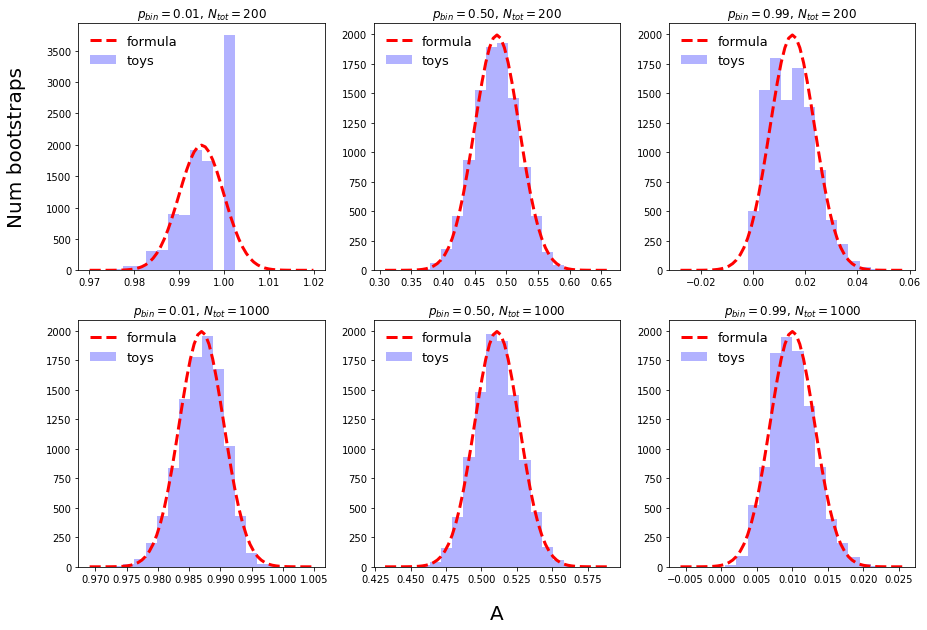

In [106]:
#  Loops over p_bin and N_tot settings, generate a dataset, and boostrap


num_rows, num_columns = len(v_dataset_size), len(v_prob_in_bin)
fig = plt.figure(figsize=(5*num_columns, 5*num_rows))
for row, dataset_size in enumerate(v_dataset_size) :
    for col, prob_in_bin in enumerate(v_prob_in_bin) :
        print(f"Running {num_bootstraps} bootstraps for p_bin={prob_in_bin:.2f}, Ntot={dataset_size}")
        dataset, weights = generate_dataset (prob_in_bin, dataset_size)
        estimated_A, estimated_A_err = get_A_and_error_from_dataset (dataset, weights)
        bootstrap_As = []
        for bs_idx in range(num_bootstraps) :
            bootstrap_weights = np.random.poisson(1, size=(dataset_size,))
            bootstrap_As.append(get_A_from_dataset(dataset, weights*bootstrap_weights))
        Amin, Amax = estimated_A-5*estimated_A_err, estimated_A+5*estimated_A_err
        Arange     = Amax - Amin
        A_binwidth = Arange / 20.
        A_bins        = np.linspace(Amin, Amax, 21)
        A_scan_points = np.linspace(Amin, Amax, 61)
        ax = fig.add_subplot(num_rows, num_columns, row*num_columns + col + 1)
        ax.hist(bootstrap_As, bins=A_bins, color="blue", alpha=0.3, label="toys")
        ax.plot(A_scan_points, num_bootstraps*A_binwidth*stats.norm.pdf(A_scan_points, estimated_A, estimated_A_err), "--", linewidth=3, c="red", label="formula")
        ax.set_title(r"$p_{bin}="+f"{prob_in_bin:.2f}"+r"$, $N_{tot}"+f"={dataset_size}$")
        if row == num_rows-1 and col == num_rows-1 : ax.set_xlabel("A", fontsize=20, labelpad=20)
        if row ==0 and col == 0 : ax.set_ylabel("Num bootstraps", fontsize=20, labelpad=20)
        ax.legend(loc="upper left", frameon=False, fontsize=13)
        
plt.show()